In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [20]:
def get_coeff(c_1, c_2, scale):
    scale_sq = scale ** 2
    part1 = (c_1 - 1) / (c_1 + c_2) + scale_sq / (1 - scale_sq)
    part2 = part1 ** 2 + (scale_sq / (1 - scale_sq)) * 4 * c_2 / (c_1 + c_2)**2
    assert(part2 >= 0)
    
    a_1_option1 = (c_1 - 1) / (c_1 + c_2) - (part1 + math.sqrt(part2)) / 2
    a_1_option2 = (c_1 - 1) / (c_1 + c_2) - (part1 - math.sqrt(part2)) / 2
    isvalid_option1 = a_1_option1 > (c_1 - 1)/(c_1 + c_2) and a_1_option1 < c_1/(c_1 + c_2)
    isvalid_option2 = a_1_option2 > (c_1 - 1)/(c_1 + c_2) and a_1_option2 < c_1/(c_1 + c_2)

    assert(isvalid_option1 or isvalid_option2)
    assert(not (isvalid_option1 and isvalid_option2))
    
    a_1 = a_1_option1 if isvalid_option1 else a_1_option2
    a_2 = 1 - 1/(c_1 + c_2) - a_1
    return (a_1, a_2)

def te(c_1, c_2, scale):
    a_1, a_2 = get_coeff(c_1, c_2, scale)
    te = 1/ ((c_1 + c_2) * a_1 / scale**2 + (c_1 + c_2) * a_2)
    return te

In [93]:
c_1 = 1.0 # n_1 / p
c_2 = 4.0 # n_2 / p
scale = 0.25 # Sigma1 / Sigma2

a_1, a_2 = get_coeff(c_1, c_2, scale)

print(a_1, a_2, te(c_1, c_2, scale))

0.07519213730733137 0.7248078626926686 0.10374078590702895


## increase number of source task data points

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


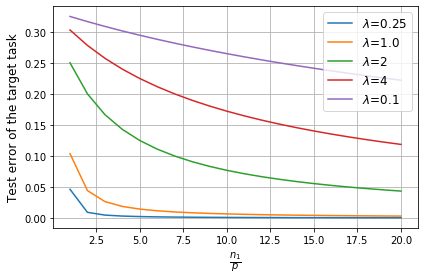

In [94]:
c_1_list = [i * 1.0 for i in range(1, 21)]

scale4 = 0.1
te_list_scale4 = [te(c_1, c_2, scale4) for c_1 in c_1_list]

scale0 = 0.25
te_list_scale0 = [te(c_1, c_2, scale0) for c_1 in c_1_list]

scale1 = 1.0
te_list_scale1 = [1/(c_1 + c_2 - 1) for c_1 in c_1_list]

scale2 = 2
te_list_scale2 = [te(c_1, c_2, scale2) for c_1 in c_1_list]

scale3 = 4
te_list_scale3 = [te(c_1, c_2, scale3) for c_1 in c_1_list]


plt.plot(c_1_list, te_list_scale4, label=r'$\lambda$=' + str(scale0))
plt.plot(c_1_list, te_list_scale0, label=r'$\lambda$=' + str(scale1))
plt.plot(c_1_list, te_list_scale1, label=r'$\lambda$=' + str(scale2))
plt.plot(c_1_list, te_list_scale2, label=r'$\lambda$=' + str(scale3))
plt.plot(c_1_list, te_list_scale3, label=r'$\lambda$=' + str(scale4))

plt.xlabel(r'$\frac{n_1}{p}$', fontsize=14)
plt.ylabel('Test error of the target task', fontsize=12)
plt.grid(0.4)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('scaling.eps')

In [38]:
1-(1-1.0/1000)**128

0.12020296723590385

## Complementary covariance matrices

In [80]:
def get_coeff2(c_1, c_2, scale):
    d = (scale - 1.0/scale)**2
    coeff = [0 for i in range(4)]
    coeff[0] = -d
    coeff[1] = d * (1 + (c_1 - 1.5)/(c_1 + c_2))
    coeff[2] = 1 - 1/(c_1 + c_2) - (1 - 1/(c_1 + c_2)) * ((c_1 - 0.5) / (c_1 + c_2)) * d
    coeff[3] = - (c_1/(c_1 + c_2)) * (1 - 1/(c_1 + c_2))**2
    A = np.roots(coeff)
    a_1 = 0
    num_valid = 0
    for a in A:
        if abs(np.imag(a)) <= 0.000001 and a > (c_1 - 1)/(c_1 + c_2) and a < c_1/(c_1 + c_2):
            a_1 = a
            num_valid += 1
            
    assert(num_valid == 1)
    a_2 = 1 - 1/(c_1 + c_2) - a_1
    return (a_1, a_2)

def te2(c_1, c_2, scale):
    if scale == 1:
        return 1/ (c_1 + c_2 - 1)
    
    a_1, a_2 = get_coeff2(c_1, c_2, scale)
    scale_sq = scale**2
    te = 0.5 / ((c_1 + c_2) * (scale_sq * a_1 + a_2))
    te += 0.5 / ((c_1 + c_2) * (a_1 / scale_sq + a_2))
    return te

In [86]:
c_1 = 4.0
c_2 = 4.0
scale = 10.0

te2(c_1, c_2, scale)

0.14285714285714293

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


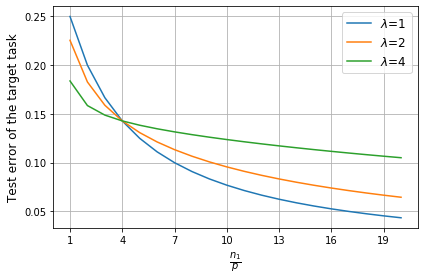

In [97]:
c_1_list = [i * 1.0 for i in range(1, 21)]
scale_list = [1, 2, 4]

te_list = [[te2(c_1, c_2, scale) for c_1 in c_1_list] for scale in scale_list]

for i, ts in enumerate(te_list):
    plt.plot(c_1_list, ts, label=r'$\lambda$=' + str(scale_list[i]))

plt.xlabel(r'$\frac{n_1}{p}$', fontsize=14)
plt.ylabel('Test error of the target task', fontsize=12)
plt.xticks(np.arange(1, 22, step=3))
#axes = plt.gca()
#axes.set_xlim([1.0, 20.0])
plt.grid(0.4)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('complementary.eps')